In [31]:
import sqlite3
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


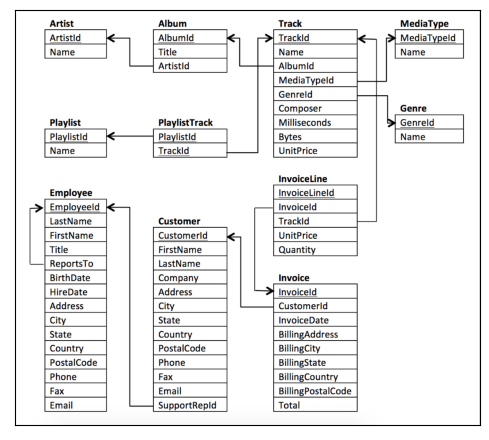

In [32]:
schema = 'db_schema.png'
image = plt.imread(schema)
plt.figure(figsize = (6, 6))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [33]:
db_name = 'chinook.db'
def run_query(q):
    with sqlite3.connect(db_name) as conn:
        return pd.read_sql(q, conn)

def run_command(c):
    with sqlite3.connect(db_name) as conn:
        conn.isolation_level = None
        conn.execute(c)
        
def show_tables():
    view_query = 'SELECT name, type FROM sqlite_master WHERE type IN ("table","view");'
    return run_query(view_query)

def printSchema():
    with sqlite3.connect(db_name) as conn:
        
        for (tableName,) in conn.execute(
            """
            select NAME from SQLITE_MASTER where type IN ("table","view") order by NAME;
            """
        ):
            print("{}:".format(tableName))
            for (
                columnID, columnName, columnType,
                columnNotNull, columnDefault, columnPK,
            ) in conn.execute("pragma table_info('{}');".format(tableName)):
                print("  {id}: {name}({type}){null}{default}{pk}".format(
                    id=columnID,
                    name=columnName,
                    type=columnType,
                    null=" not null" if columnNotNull else "",
                    default=" [{}]".format(columnDefault) if columnDefault else "",
                    pk=" *{}".format(columnPK) if columnPK else "",
                ))
                
def print_Primary_Keys():
    # Connect to the database
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()

        # Get the table names from the schema
        cursor.execute("SELECT name FROM sqlite_master WHERE type in ('table','view');")
        tables = cursor.fetchall()

        # Iterate over the tables
        for table in tables:
            table_name = table[0]
            print(f"Table: {table_name}")

            # Get the primary key information
            cursor.execute(f"PRAGMA table_info('{table_name}');")
            columns = cursor.fetchall()
            primary_keys = [column[1] for column in columns if column[5] == 1]

            print("Primary keys:")
            for pk in primary_keys:
                print(pk)
                print("\n")
                
def print_Foreign_Keys():
    # Connect to the database
    with sqlite3.connect(db_name) as conn:
        cursor = conn.cursor()

        # Get the table names from the schema
        cursor.execute("SELECT name FROM sqlite_master WHERE type in ('table','view');")
        tables = cursor.fetchall()

        # Iterate over the tables
        for table in tables:
            table_name = table[0]
            print(f"Table: {table_name}")

            # Get the primary key information
            cursor.execute(f"PRAGMA foreign_key_list('{table_name}');")
            foreign_keys = cursor.fetchall()

            print("Foreign keys:")
            for fk in foreign_keys:
                print(f"Column: {fk[3]} --> Foreign Table: {fk[2]}, Foreign Column: {fk[4]}")
                print("\n")

In [34]:
show_tables()

,name,type
0,Album,table
1,Artist,table
2,Customer,table
3,Employee,table
4,Genre,table
5,Invoice,table
6,InvoiceLine,table
7,MediaType,table
8,Playlist,table
9,PlaylistTrack,table


In [35]:
printSchema()

Album:
  0: AlbumId(INTEGER) not null *1
  1: Title(NVARCHAR(160)) not null
  2: ArtistId(INTEGER) not null
Artist:
  0: ArtistId(INTEGER) not null *1
  1: Name(NVARCHAR(120))
Customer:
  0: CustomerId(INTEGER) not null *1
  1: FirstName(NVARCHAR(40)) not null
  2: LastName(NVARCHAR(20)) not null
  3: Company(NVARCHAR(80))
  4: Address(NVARCHAR(70))
  5: City(NVARCHAR(40))
  6: State(NVARCHAR(40))
  7: Country(NVARCHAR(40))
  8: PostalCode(NVARCHAR(10))
  9: Phone(NVARCHAR(24))
  10: Fax(NVARCHAR(24))
  11: Email(NVARCHAR(60)) not null
  12: SupportRepId(INTEGER)
Employee:
  0: EmployeeId(INTEGER) not null *1
  1: LastName(NVARCHAR(20)) not null
  2: FirstName(NVARCHAR(20)) not null
  3: Title(NVARCHAR(30))
  4: ReportsTo(INTEGER)
  5: BirthDate(DATETIME)
  6: HireDate(DATETIME)
  7: Address(NVARCHAR(70))
  8: City(NVARCHAR(40))
  9: State(NVARCHAR(40))
  10: Country(NVARCHAR(40))
  11: PostalCode(NVARCHAR(10))
  12: Phone(NVARCHAR(24))
  13: Fax(NVARCHAR(24))
  14: Email(NVARCHAR(60))

In [36]:
print_Primary_Keys()

Table: Album
Primary keys:
AlbumId


Table: Artist
Primary keys:
ArtistId


Table: Customer
Primary keys:
CustomerId


Table: Employee
Primary keys:
EmployeeId


Table: Genre
Primary keys:
GenreId


Table: Invoice
Primary keys:
InvoiceId


Table: InvoiceLine
Primary keys:
InvoiceLineId


Table: MediaType
Primary keys:
MediaTypeId


Table: Playlist
Primary keys:
PlaylistId


Table: PlaylistTrack
Primary keys:
PlaylistId


Table: Track
Primary keys:
TrackId




In [37]:
print_Foreign_Keys()

Table: Album
Foreign keys:
Column: ArtistId --> Foreign Table: Artist, Foreign Column: ArtistId


Table: Artist
Foreign keys:
Table: Customer
Foreign keys:
Column: SupportRepId --> Foreign Table: Employee, Foreign Column: EmployeeId


Table: Employee
Foreign keys:
Column: ReportsTo --> Foreign Table: Employee, Foreign Column: EmployeeId


Table: Genre
Foreign keys:
Table: Invoice
Foreign keys:
Column: CustomerId --> Foreign Table: Customer, Foreign Column: CustomerId


Table: InvoiceLine
Foreign keys:
Column: TrackId --> Foreign Table: Track, Foreign Column: TrackId


Column: InvoiceId --> Foreign Table: Invoice, Foreign Column: InvoiceId


Table: MediaType
Foreign keys:
Table: Playlist
Foreign keys:
Table: PlaylistTrack
Foreign keys:
Column: TrackId --> Foreign Table: Track, Foreign Column: TrackId


Column: PlaylistId --> Foreign Table: Playlist, Foreign Column: PlaylistId


Table: Track
Foreign keys:
Column: MediaTypeId --> Foreign Table: MediaType, Foreign Column: MediaTypeId


Col

In [38]:
q1 = '''
    SELECT Country, COUNT(Country) as Invoices, SUM(Invoice.Total) as Total
    FROM Invoice
    JOIN Customer ON Invoice.CustomerId = Customer.CustomerId
    Group by Country
    ORDER BY Total DESC
    LIMIT 10;
    '''
df1 = run_query(q1)
df1.head(10)

,Country,Invoices,Total
0,USA,91,523.06
1,Canada,56,303.96
2,France,35,195.10
3,Brazil,35,190.10
4,Germany,28,156.48
5,United Kingdom,21,112.86
6,Czech Republic,14,90.24
7,Portugal,14,77.24
8,India,13,75.26
9,Chile,7,46.62


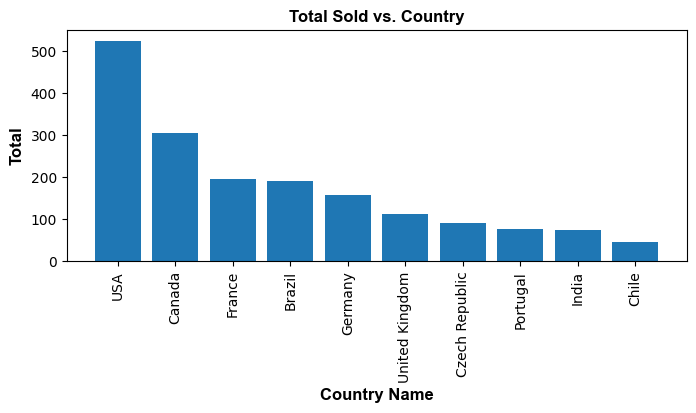

In [39]:
plt.figure(figsize=(8, 3))
plt.bar(df1['Country'], df1['Total'])
title_font = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}
label_font = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}

plt.xticks(rotation=90,)
plt.xlabel('Country Name',label_font)
plt.ylabel('Total',label_font)
plt.title('Total Sold vs. Country',title_font)
plt.show()

In [40]:
q2 = '''
    SELECT Album.Title, sum(Track.UnitPrice) as Total_Price
    FROM Album
    JOIN Track on Track.AlbumID = Album.AlbumID
    GROUP BY Album.Title
    ORDER BY Total_Price DESC;
    '''
df2 = run_query(q2).head(10)

df2.head(5)

,Title,Total_Price
0,Greatest Hits,56.43
1,"Lost, Season 3",51.74
2,"The Office, Season 3",49.75
3,"Lost, Season 1",49.75
4,"Lost, Season 2",47.76


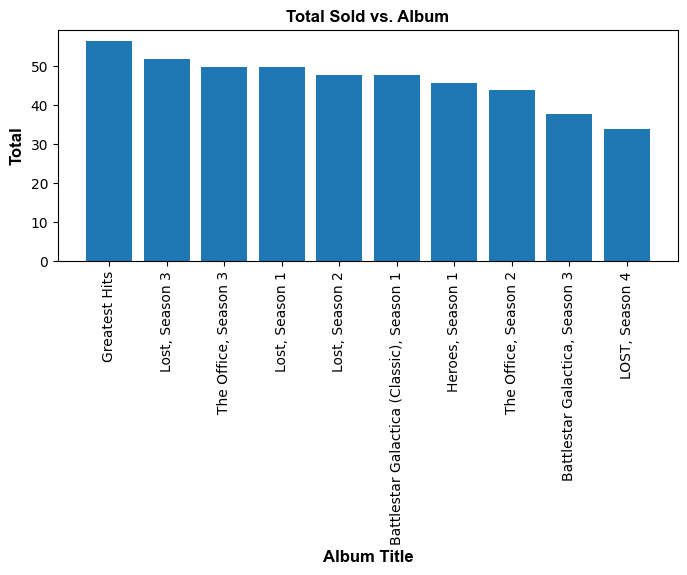

In [41]:
plt.figure(figsize=(8, 3))
plt.bar(df2['Title'], df2['Total_Price'])
title_font = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}
label_font = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}

plt.xticks(rotation=90,)
plt.xlabel('Album Title',label_font)
plt.ylabel('Total',label_font)
plt.title('Total Sold vs. Album',title_font)
plt.show()

In [48]:
q3 = '''
    SELECT Genre.name, COUNT(Track.trackid) AS Tracks_Sold
    FROM Genre
    JOIN Track
    ON Genre.genreid = track.genreid
    JOIN InvoiceLine
    ON InvoiceLine.trackid = track.trackid
    GROUP BY Genre.name
    ORDER BY Tracks_Sold DESC;
    '''
df3 = run_query(q3).head(10)

df3.head(10)

,Name,Tracks_Sold
0,Rock,835
1,Latin,386
2,Metal,264
3,Alternative & Punk,244
4,Jazz,80
5,Blues,61
6,TV Shows,47
7,R&B/Soul,41
8,Classical,41
9,Reggae,30


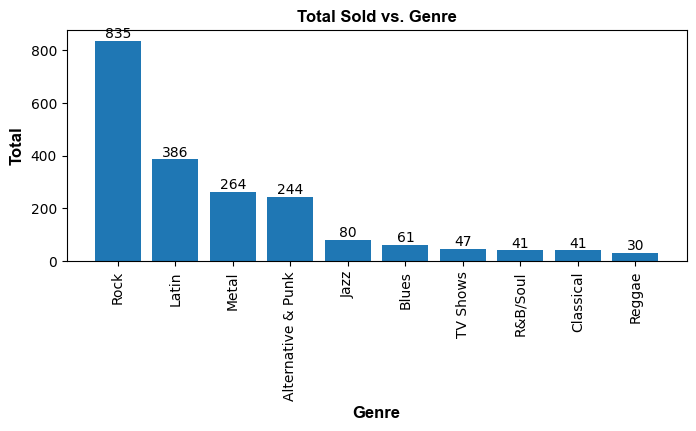

In [50]:
plt.figure(figsize=(8, 3))
plt.bar(df3['Name'],df3['Tracks_Sold'])
title_font = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}
label_font = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}

plt.xticks(rotation=90,)
plt.xlabel('Genre',label_font)
plt.ylabel('Total',label_font)
plt.title('Total Sold vs. Genre',title_font)

# Add value labels to each bar
for i, value in enumerate(df3['Tracks_Sold']):
    plt.text(i, value, str(value), ha='center', va='bottom')
    
plt.show()


In [44]:
q4 = '''
    SELECT Album.albumid, Album.title, Artist.name AS Artist_Name, SUM(InvoiceLine.unitprice * InvoiceLine.quantity) AS Sales
    FROM Artist
    JOIN Album
    ON Artist.artistid = Album.artistid
    JOIN Track
    ON Album.albumid = Track.albumid
    JOIN InvoiceLine
    ON InvoiceLine.trackid = Track.trackid
    GROUP BY Album.albumid
    ORDER BY Sales DESC
    LIMIT 10;
    '''
df4 = run_query(q4).head(10)

df4.head(5)

,AlbumId,Title,Artist_Name,Sales
0,253,"Battlestar Galactica (Classic), Season 1",Battlestar Galactica (Classic),35.82
1,251,"The Office, Season 3",The Office,31.84
2,23,Minha Historia,Chico Buarque,26.73
3,231,"Lost, Season 2",Lost,25.87
4,228,"Heroes, Season 1",Heroes,25.87


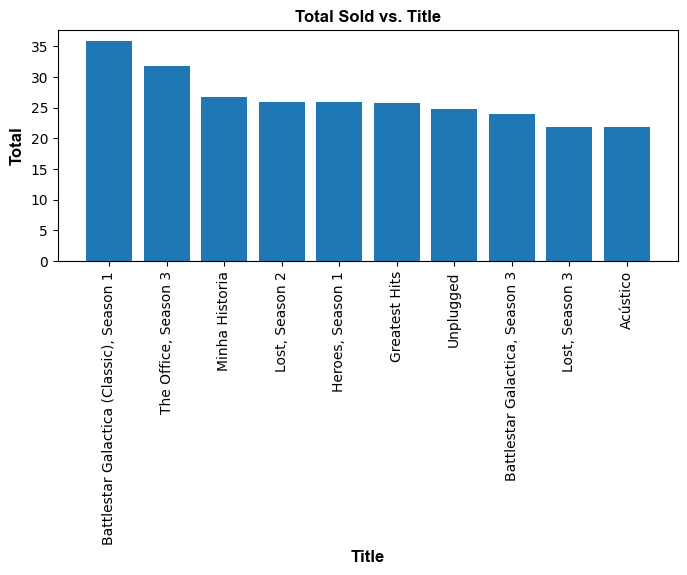

In [45]:
plt.figure(figsize=(8, 3))
plt.bar(df4['Title'],df4['Sales'])
title_font = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}
label_font = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}

plt.xticks(rotation=90,)
plt.xlabel('Title',label_font)
plt.ylabel('Total',label_font)
plt.title('Total Sold vs. Title',title_font)
plt.show()

In [46]:
q5 = ''' 
    select customer.country as Country, sum(total) as Total_Sold
    from invoice
    join customer 
    on invoice.customerid = customer.customerid
    group by customer.country
    order by total_sold desc;
    '''
df5 = run_query(q5).head(10)

df5.head(10)    

,Country,Total_Sold
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


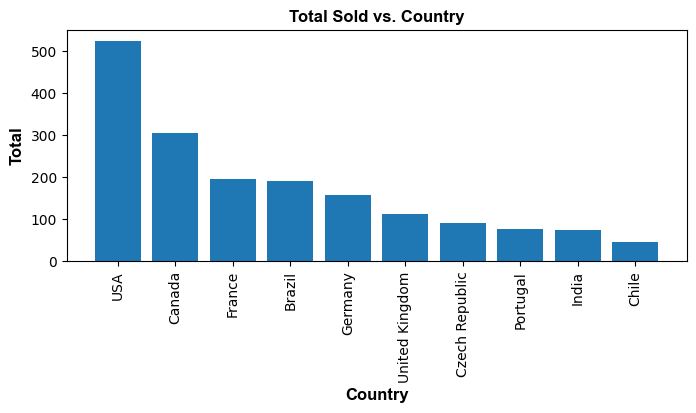

In [47]:
plt.figure(figsize=(8, 3))
plt.bar(df5['Country'],df5['Total_Sold'])
title_font = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}
label_font = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}

plt.xticks(rotation=90,)
plt.xlabel('Country',label_font)
plt.ylabel('Total',label_font)
plt.title('Total Sold vs. Country',title_font)
plt.show()

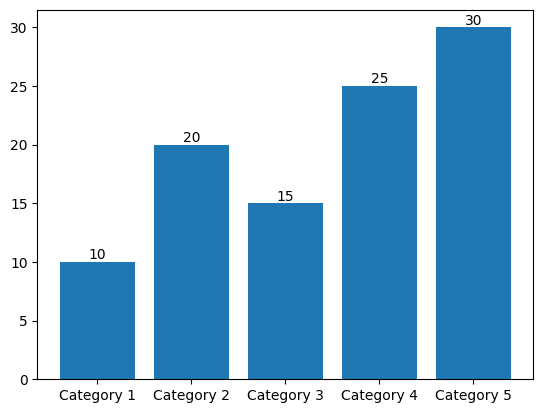

In [49]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values = [10, 20, 15, 25, 30]

# Plot the bar chart
plt.bar(categories, values)

# Add value labels to each bar
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()